## **Exploratory Data Analysis**

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Clean_Telco_Customer_Churn_Dataset.csv")


In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.describe()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [7]:
#Overall Churn Rate
churn_rate = df['Churn'].value_counts(normalize=True) * 100
churn_rate


Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

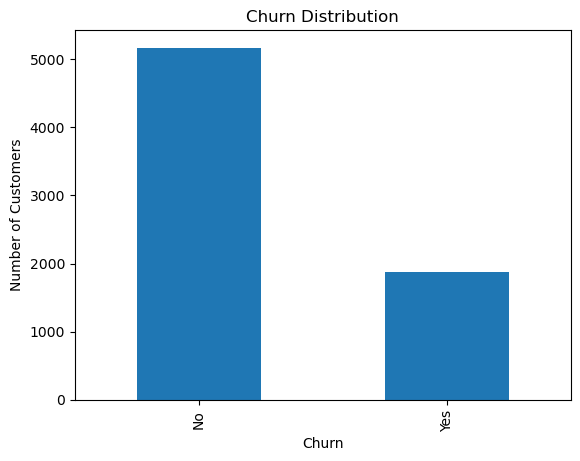

In [8]:
#Churn distribution
import matplotlib.pyplot as plt

df['Churn'].value_counts().plot(kind='bar')
plt.title("Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Number of Customers")
plt.show()


In [9]:
#Gender vs churn
pd.crosstab(df['gender'], df['Churn'], normalize='index') * 100


Churn,No,Yes
gender,,
Female,73.079128,26.920872
Male,73.839662,26.160338


In [10]:
#Senior citizon vs churn
pd.crosstab(df['SeniorCitizen'], df['Churn'], normalize='index') * 100


Churn,No,Yes
SeniorCitizen,,
0,76.393832,23.606168
1,58.318739,41.681261


In [11]:
#Tenure Analysis
df.groupby('Churn')['tenure'].describe()


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
No,5174.0,37.569965,24.113777,0.0,15.0,38.0,61.0,72.0
Yes,1869.0,17.979133,19.531123,1.0,2.0,10.0,29.0,72.0


In [19]:
#contract type vs churn
(pd.crosstab(df['Contract'], df['Churn'], normalize='index') * 100).round(2)


Churn,No,Yes
Contract,,
Month-to-month,57.29,42.71
One year,88.73,11.27
Two year,97.17,2.83


In [17]:
#Payment method vs churn
pd.crosstab(df['PaymentMethod'], df['Churn'], normalize='index') * 100


Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),83.290155,16.709845
Credit card (automatic),84.756899,15.243101
Electronic check,54.714588,45.285412
Mailed check,80.893300,19.106700


In [20]:
#charges vs churn
df.groupby('Churn')[['MonthlyCharges','TotalCharges']].mean()


,MonthlyCharges,TotalCharges
Churn,,
No,61.265124,2549.911442
Yes,74.441332,1531.796094


## **Customer Segmentation**

In [21]:
seg_df = df[[
    'tenure',
    'MonthlyCharges',
    'TotalCharges',
    'Contract',
    'PaymentMethod',
    'InternetService'
]]


In [22]:
#Handle categorical variables (ONE-HOT ENCODING)
seg_df_encoded = pd.get_dummies(seg_df, drop_first=True)
seg_df_encoded.head()


,tenure,MonthlyCharges,TotalCharges,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No
0,1,29.85,29.85,False,False,False,True,False,False,False
1,34,56.95,1889.50,True,False,False,False,True,False,False
2,2,53.85,108.15,False,False,False,False,True,False,False
3,45,42.30,1840.75,True,False,False,False,False,False,False
4,2,70.70,151.65,False,False,False,True,False,True,False


In [23]:
#Feature scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
seg_scaled = scaler.fit_transform(seg_df_encoded)


In [24]:
#Choose number of clusters (Elbow Method)
from sklearn.cluster import KMeans

wcss = []
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(seg_scaled)
    wcss.append(kmeans.inertia_)


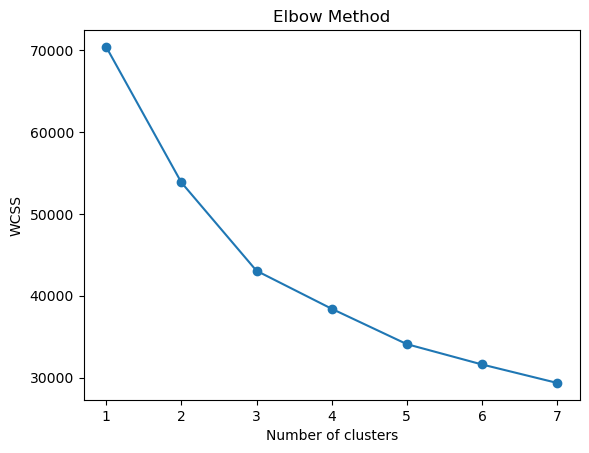

In [25]:
import matplotlib.pyplot as plt

plt.plot(range(1, 8), wcss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()


In [26]:
#Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Segment'] = kmeans.fit_predict(seg_scaled)


In [27]:
#Understand each customer segment
df.groupby('Segment')[[
    'tenure',
    'MonthlyCharges',
    'TotalCharges'
]].mean()


,tenure,MonthlyCharges,TotalCharges
Segment,,,
0,57.978928,87.220362,5088.251764
1,26.275305,30.394721,737.127880
2,16.043224,76.343400,1269.088006


In [28]:
#Churn distribution by segment
(pd.crosstab(df['Segment'], df['Churn'], normalize='index') * 100).round(2)


Churn,No,Yes
Segment,,
0,87.45,12.55
1,87.13,12.87
2,49.38,50.62
